# Probability



Probability theory talks about the construction and implications of probability models. For example, given a probability distribution, what are the mean and variance? What is the distribution of a transformed random variable? In computer simulations, probability theory tells us what will happen to the generated realizations, in particular when the experiments can be repeated as many times as the researcher wishes. This is a real-world analogue of the frequentist's interpretation of probability.

## Probability Space


A *sample space* $\Omega$ is a collection of all possible outcomes. It is a set of things.

An *event* $A$ is a subset of $\Omega$. It is something of interest on the sample space.

A $\sigma$-*field* is a complete set of events that include all countable unions, intersections, and differences.
It is a well-organized structure built on the sample space. 

A *probability measure* satisfies

* (positiveness) $P\left(A\right)\geq0$ for all events;
* (countable additivity) If $A_{i}$, $i\in\mathbb{N}$, 
are mutually disjoint, then
$P\left(\bigcup_{i\in\mathbb{N}}A_{i}\right)=\sum_{i\in\mathbb{N}} P \left(A_{i}\right).$
* $P(\Omega) = 1$.



The above construction gives a mathematically well-defined probability measure, but we have not yet
answered "How to assign the probability?"

There are two major schools of thinking on probability assignment. One is
the *frequentist*, who considers probability as the average chance of occurrence if a large number of experiments
are carried out. The other is the *Bayesian*, who deems probability as a subjective brief.
The principles of these two schools are largely incompatible, while each school has
peculiar pros and cons under different real-world contexts.

## Random Variable

A *random variable* maps an event to a real number. If the outcome is multivariate, we call it a *random vector*.


**Data example**

Data source: [HK top 300 Youtubers](https://www.kaggle.com/datasets/patriotboy112/hks-top-300-youtubers). We look at the number of uploaded videos in these accounts.

In [1]:
import pandas as pd

# Reading the CSV file
d0 = pd.read_csv("HKTop300YouTubers.csv")
print(d0)


     rank                                           Youtuber subscribers  \
0       1                          Shadow MusicShadow Music    7,690,000   
1       2                                  Emi WongEmi Wong    4,870,000   
2       3                                iQIYI 爱奇艺iQIYI 爱奇艺    4,010,000   
3       4  South China Morning PostSouth China Morning Post    2,650,000   
4       5                                      GEM鄧紫棋GEM鄧紫棋    2,520,000   
..    ...                                                ...         ...   
295   296                          Jessica WongJessica Wong       69,000   
296   297                                          昼与白鲸昼与白鲸       68,700   
297   298                                        后宫冷婶儿后宫冷婶儿       68,600   
298   299                              CatGirl貓女孩CatGirl貓女孩       68,200   
299   300                                    男人EEETV男人EEETV       66,400   

       video views video count          category  started  
0    3,665,970,114       1,

In [2]:
# Remove NA and zeros by replacing zeros with NaN and then dropping rows with any NaN values
d0.replace(0, pd.NA, inplace=True)
d0.dropna(inplace=True)

# Select columns 3 to 5 (Python uses 0-based indexing, adjust accordingly)
d1 = d0.iloc[:, 2:5].copy()

# Rename columns
d1.columns = ["subs", "view", "count"] # "count" is the number of videos uploaded
print( d1 )

          subs           view   count
0    7,690,000  3,665,970,114   1,144
1    4,870,000    607,656,993     390
2    4,010,000  1,744,552,001   9,740
3    2,650,000  2,612,265,071  11,376
4    2,520,000  1,752,111,944      77
..         ...            ...     ...
295     69,000      3,008,911      80
296     68,700     18,950,918     156
297     68,600     43,142,355     323
298     68,200              0       0
299     66,400      7,627,706     147

[294 rows x 3 columns]


In [3]:
# convert string into numbers
for column in d1.columns:
    d1[column] = pd.to_numeric(d1[column].str.replace(',', ''), errors='coerce')

print(d1)

        subs        view  count
0    7690000  3665970114   1144
1    4870000   607656993    390
2    4010000  1744552001   9740
3    2650000  2612265071  11376
4    2520000  1752111944     77
..       ...         ...    ...
295    69000     3008911     80
296    68700    18950918    156
297    68600    43142355    323
298    68200           0      0
299    66400     7627706    147

[294 rows x 3 columns]


In [4]:
d1["count"]

0       1144
1        390
2       9740
3      11376
4         77
       ...  
295       80
296      156
297      323
298        0
299      147
Name: count, Length: 294, dtype: int64

In [5]:
import numpy as np

# if any value is zero, remove the row
d1 = d1[(d1 != 0).all(axis=1)]
d1_log= np.log(d1)

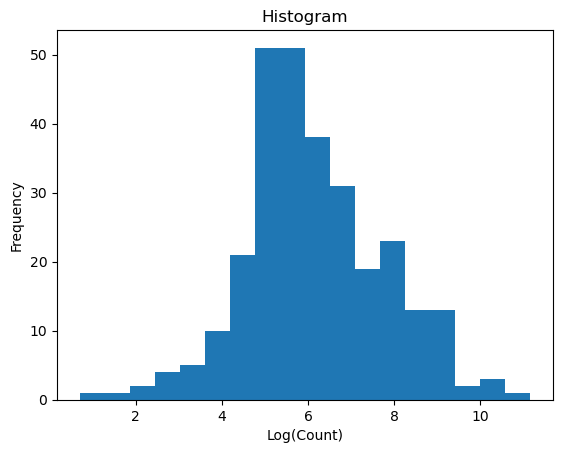

In [6]:
import matplotlib.pyplot as plt

# Plotting histogram of the 'count' column after log transformation
plt.hist(d1_log['count'], bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram')
plt.xlabel('Log(Count)')
plt.ylabel('Frequency')
plt.show()

## Distribution Fun

We go back to some terminologies we learned in an undergraduate
probability course. A *(cumulative) distribution function*
$F:\mathbb{R}\mapsto [0,1]$ is defined as

$$
F\left(x\right)=P\left(X\leq x\right).
$$
It is often abbreviated as CDF, and it has the following properties.

* $\lim_{x\to-\infty}F\left(x\right)=0$,
* $\lim_{x\to\infty}F\left(x\right)=1$,
* non-decreasing,
* right-continuous $\lim_{y\to x^{+}}F\left(y\right)=F\left(x\right).$

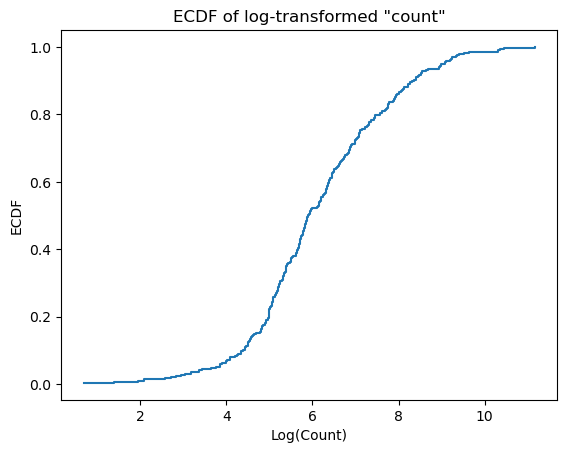

In [7]:
# Assuming d1_log is a DataFrame and 'count' is a column in d1_log
# Calculate the ECDF for the 'count' column
x = np.sort(d1_log['count'])
y = np.arange(1, len(x)+1) / len(x)

# Plot the ECDF as a step plot
plt.step(x, y, where='post')
plt.xlabel('Log(Count)')
plt.ylabel('ECDF')
plt.title('ECDF of log-transformed "count"')
plt.show()

The $q$-th quantile of a random variable is $\min_{x\in \mathbb R} P(X \leq x) \geq q$.

In [8]:
d1_log['count'].quantile([0.25, 0.5, 0.75, 1.0])

0.25     5.087596
0.50     5.899897
0.75     7.107425
1.00    11.164587
Name: count, dtype: float64


For a continuous distribution, if its CDF is differentiable, then 

$$
f(x) = d F\left(x\right) / d x
$$

is called the *probability density function* of $X$, often abbreviated as PDF.
It is easy to show that $f\left(x\right)\geq0$, and by the Leibniz integral rule
    $\int_{a}^{b}f\left(x\right)dx=F\left(b\right)-F\left(a\right)$.

For a discrete random variable, its CDF is obviously non-differentiable at any jump points. 
In this case, we define the *probability mass function* $f(x) = F(x) - \lim_{y \to x^{-}} F(y)$.


We have learned many parametric distributions. A parametric distribution can be completely 
characterized by a few parameters.

**Examples**

* Binomial distribution. 

$$f(x = k ;p) = \binom{n}{k}  p^k (1-p)^{n-k}$$

* Poisson distribution. 

$$f(x = k;\lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}$$

* Uniform distribution. 

$$f(x; a, b) = \frac{1}{b-a} \cdot \mathbf{1}\{a\leq x \leq b\}$$

* Normal distribution. 

$$
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} \exp\left( - \frac{(x-\mu)^2}{2\sigma^2}\right)
$$

Its mean is $\mu$ and variance $\sigma^2$.

* Log-normal distribution.

$$
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} \exp\left( - \frac{(\log(x)-\mu)^2}{2\sigma^2}\right),
$$

Its means is $\exp(\mu + 0.5 \sigma^2)$ and variance
$[\exp(\sigma^2 - 1)] \exp(2\mu+ \sigma^2)$.
* $\chi^{2}$, $t$, and $F$ distributions.


**Example** 

`scipy.stat` has a rich collection of distributions.


In [9]:
from scipy.stats import norm

# Calculate the 97.5th percentile of the standard normal distribution
norm.ppf(0.975)

np.float64(1.959963984540054)

In [10]:
norm.cdf(0)

np.float64(0.5)

In [11]:
norm.pdf(0)

np.float64(0.3989422804014327)

In [12]:
np.random.normal(loc=0, scale=1, size=3)

array([-0.04551741,  0.90159374,  0.21419417])

In [13]:
np.random.poisson(lam=5, size=3)

array([6, 4, 4])


Below is a piece of code for demonstration.

1. Plot the density of standard normal distribution over an equally spaced grid system.
2. Generate 1000 observations for $N(0,1)$. Plot the histogram density, a nonparametric estimation of the density.
3. Calculate the 95th quantile and the empirical probability of observing a value greater than the 95th quantile.
In population, this value is 5%. What is the number coming out of this experiment?

(Since we do not fix the random seed in the computer, the outcome is slightly different each time when we run the code.)

The empirical rejection probability is 0.051


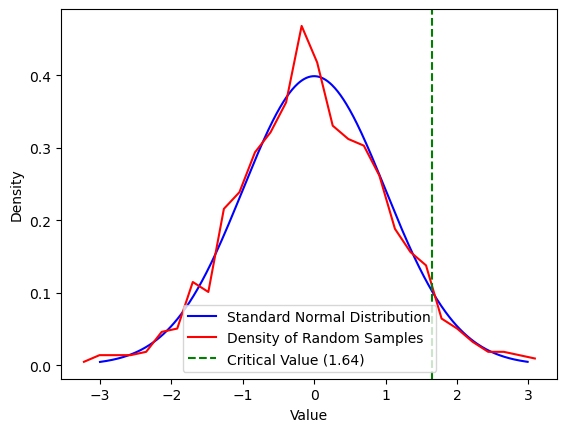

In [14]:

# Create x-axis from -3 to 3 with steps of 0.01
x_axis = np.arange(-3, 3, 0.01)

# Calculate the density of the standard normal distribution for x_axis
y = norm.pdf(x_axis)

# Plot the standard normal distribution density
plt.plot(x_axis, y, label='Standard Normal Distribution', color='blue')
plt.xlabel('Value')
plt.ylabel('Density')

# Generate 1000 random samples from a standard normal distribution
z = np.random.normal(size=1000)

# Calculate the density of the random samples and plot it
density = np.histogram(z, bins=30, density=True)
bin_centers = 0.5*(density[1][1:] + density[1][:-1])
plt.plot(bin_centers, density[0], color='red', label='Density of Random Samples')

# Calculate the critical value at the 95th percentile
crit = norm.ppf(0.95)

# Calculate the empirical rejection probability
empirical_rejection_probability = np.mean(z > crit)
print(f"The empirical rejection probability is {empirical_rejection_probability}")

# Add a vertical line for the critical value
plt.axvline(crit, color='green', linestyle='--', label=f'Critical Value ({crit:.2f})')

plt.legend()
plt.show()

## Integration

In probability theory, an integral
$\int X\mathrm{d}P$ is called the *expected value,* or
*expectation,* of $X$. We often use the notation
$E\left[X\right]$, instead of $\int X\mathrm{d}P$, for convenience.

The expectation is the average of a random variable,
despite that we cannot foresee the realization of a random variable in a particular trial
(otherwise there is no uncertainty). In the frequentist's view,
the expectation is the average outcome if we carry out a large number of independent
trials.

If we know the probability mass function of a discrete random variable, its expectation
is calculated as $E\left[X\right]=\sum_{x}xP\left(X=x\right)$.
If a continuous random variable has a PDF $f(x)$, its expectation
can be computed as  $E\left[X\right]=\int xf\left(x\right)\mathrm{d}x$.




In [15]:
np.mean( d1_log["count"] )

np.float64(6.146389135729357)


Here are some properties of the expectation.



-   $E\left[X^{r}\right]$ is call the $r$-moment of $X$. The *mean* of a random variable is the first moment $\mu=E\left[X\right]$, and
the second *centered* moment is called the *variance*
$\mathrm{var}\left[X\right]=E [(X-\mu)^{2}]$.

In [16]:
np.var(d1_log["count"])

np.float64(2.6415986858999068)


The third centered moment $E\left[\left(X-\mu\right)^{3}\right]$,
called *skewness*, is a measurement of the
symmetry of a random variable, and the fourth centered moment
    $E\left[\left(X-\mu\right)^{4}\right]$, called *kurtosis*, is
     a measurement of the tail thickness.

- We call
    $E\left[\left(X-\mu\right)^{3}\right]/\sigma^{3}$ the *skewness coefficient*, and
    $E\left[\left(X-\mu\right)^{4}\right]/\sigma^{4}-3$ *degree of excess*. A normal distribution's  skewness and  degree of excess are both zero.

- Moments do not always exist. For example, the mean of the Cauchy distribution does not exist,
and the variance of the $t(2)$ distribution does not exist.

- $E[\cdot]$ is a linear operation. $E[a X_1 + b X_2] = a E[X_1] + b E[X_2].$

-   *Jensen's inequality* is an important fact.
A function $\varphi(\cdot)$ is convex if
$\varphi( a x_1 + (1-a) x_2 ) \leq a \varphi(x_1) + (1-a) \varphi(x_2)$ for all $x_1,x_2$
in the domain and $a\in[0,1]$. For instance, $x^2$ is a convex function.
Jensen's inequality says that if $\varphi\left(\cdot\right)$ is a convex
    function, then

    $$
    \varphi\left(E\left[X\right]\right)\leq E\left[\varphi\left(X\right)\right].
    $$

- *Markov inequality* is another simple but important fact. If $E\left[\left|X\right|^{r}\right]$
    exists, then

    $$
    P\left(\left|X\right|>\epsilon\right)\leq E\left[\left|X\right|^{r}\right]/\epsilon^{r}
    $$
    
    for all $r\geq1$. *Chebyshev inequality* $P\left(\left|X\right|>\epsilon\right)\leq E\left[X^{2}\right]/\epsilon^{2}$
    is a special case of the Markov inequality when $r=2$.


## Multivariate Random Variable

A *bivariate* random variable is a vector of two scalar random variables. More generally, a *multivariate* random variable has the *joint CDF* as

$$
F\left(x_{1},\ldots,x_{n}\right)=P\left(X_{1}\leq x_{1},\ldots,X_{n}\leq x_{n}\right).
$$

Joint PDF is defined similarly.

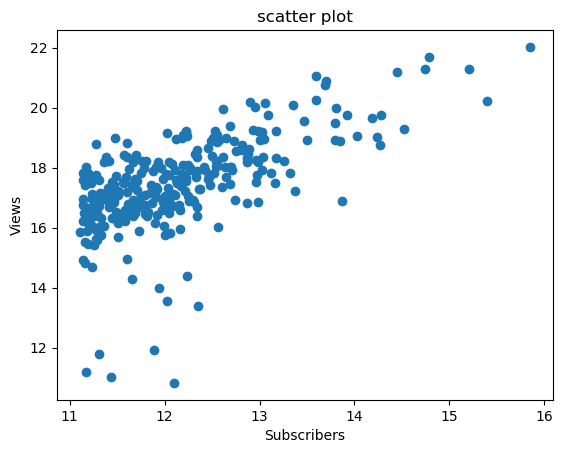

In [17]:

# Plotting 'subs' on the x-axis and 'view' on the y-axis
plt.plot(d1_log['subs'], d1_log['view'], marker='o', linestyle='None')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.title('scatter plot')
plt.show()


It is illustrative to introduce the joint distribution, conditional distribution
and marginal distribution in the simple bivariate case, and these definitions
can be extended to multivariate distributions. 
Suppose a bivariate random variable $(X,Y)$ has a joint density
$f(\cdot,\cdot)$.
The *marginal density* $f\left(y\right)=\int f\left(x,y\right)dx$ integrates out
the coordinate that is not interested.
The  *conditional density* can be written as  $f\left(y|x\right)=f\left(x,y\right)/f\left(x\right)$  for $f(x) \neq 0$.

## Independence

For two events $A_1$ and $A_2$, the *conditional probability* is

$$
P\left(A_1|A_2\right) = \frac{P\left(A_1 A_2\right)}{ P\left(A_2\right) }
$$ 

if $P(A_2) \neq  0$. 
In this definition of conditional probability, $A_2$ plays
the role of the outcome space  so that
 $P(A_1 A_2)$ is standardized by the total mass $P(A_2)$.

Since $A_1$ and $A_2$ are symmetric, we have $P(A_1 A_2) = P(A_2|A_1)P(A_1)$.
It implies

$$
P(A_1 | A_2)=\frac{P\left(A_2| A_1\right)P\left(A_1\right)}{P\left(A_2\right)}
$$

This formula is the well-known *Bayes' Theorem*, which is a cornerstone of
*decision theory*.



**Example** 

$A_1$ is the event "a student can survive CUHK's MSc program", and $A_2$ is
his or her application profile.




We say two events $A_1$ and $A_2$ are *independent* if $P(A_1A_2) = P(A_1)P(A_2)$.
If $P(A_2) \neq 0$, it is equivalent to $P(A_1 | A_2 ) = P(A_1)$.
In words, knowing $A_2$ does not change the probability of $A_1$.

If $X$ and $Y$ are independent, then $E[XY] = E[X]E[Y]$.

<!-- **Application** (Chebyshev law of large numbers) 

If
$X_{1},X_{2},\ldots,X_{n}$ are independent and identically distributed,
with mean $0$ and variance $\sigma^{2}<\infty$. Let
$Z_{n}=\frac{1}{n}\sum_{i=1}^{n} X_{i}$. Then the
probability $P\left(\left|Z_{n}\right|>\epsilon\right)\to0$ as
$n\to\infty$. -->


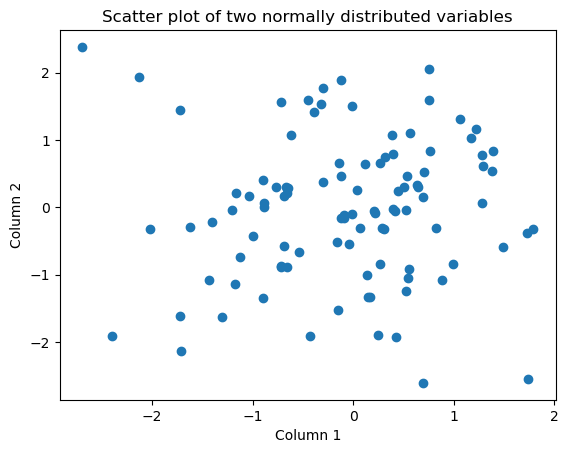

In [18]:
# Generate a 2-column matrix with 100 rows of random numbers from a standard normal distribution
Y = np.random.normal(size=(100, 2))

# Plot the first column against the second column
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter plot of two normally distributed variables')
plt.show()

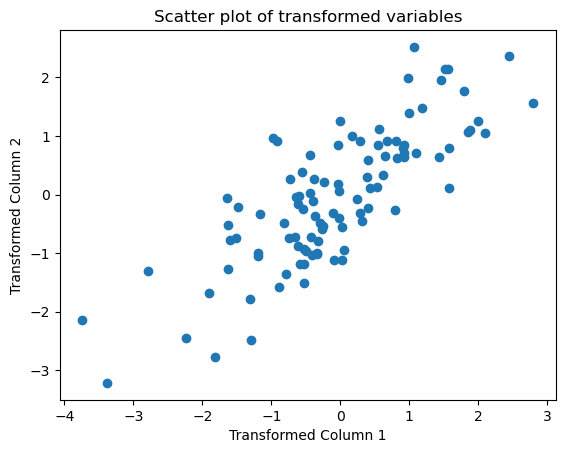

In [19]:
Y = np.random.normal(size=(100, 2))

# Apply the linear transformation
Y = np.dot(Y, np.array([[1, 0.5], [0.5, 1]]) )

# Plot the transformed data
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlabel('Transformed Column 1')
plt.ylabel('Transformed Column 2')
plt.title('Scatter plot of transformed variables')
plt.show()

## Law of Iterated Expectations




In the bivariate case, if the conditional density exists, the conditional expectation can be computed as
    $E\left[Y|X\right]=\int yf\left(y|X\right)dy$.
The law of iterated expectation implies $E\left[E\left[Y|X\right]\right]=E\left[Y\right]$.


In [20]:
# Add 'category' column from d0 to d1_log
d1_log['category'] = d0['category']

# Group by 'category' and calculate mean and count
dx = d1_log.groupby('category').agg(mean=('count', 'mean'), no=('count', 'size')).reset_index()

print(dx)

                 category      mean  no
0        Autos & Vehicles  7.516632   2
1                  Comedy  5.742748   8
2               Education  6.290369  10
3           Entertainment  6.342173  41
4        Film & Animation  5.976671  28
5                  Gaming  6.427200  28
6           Howto & Style  5.713592  31
7                   Music  5.914223  24
8         News & Politics  8.134565  22
9   Nonprofits & Activism  6.445720   1
10         People & Blogs  5.724408  68
11         Pets & Animals  6.188264   1
12   Science & Technology  6.083646   8
13                 Sports  6.140040   5
14        Travel & Events  5.483655  12


In [21]:
# Calculate weighted average over categories
weighted_avg = sum(dx['mean'] * (dx['no'] / len(d1_log)))
print(weighted_avg)

# Calculate and print overall average of 'count'
overall_avg = d1_log['count'].mean()
print(overall_avg)

6.146389135729356
6.146389135729357




Below are some properties of conditional expectations

1.  $E\left[E\left[Y|X_{1},X_{2}\right]|X_{1}\right]=E\left[Y|X_{1}\right];$
2.  $E\left[E\left[Y|X_{1}\right]|X_{1},X_{2}\right]=E\left[Y|X_{1}\right];$
3.  $E\left[h\left(X\right)Y|X\right]=h\left(X\right)E\left[Y|X\right].$

**Application**

Regression is a technique that decomposes a random variable $Y$
into two parts, a conditional mean and a residual. Write
 $Y=E\left[Y|X\right]+\epsilon$, where
$\epsilon=Y-E\left[Y|X\right]$. Show that $E[\epsilon] = 0$ and  $E[\epsilon E[Y|X] ] = 0$.

## For the next lecture

Save the following data files for the next lecture.

In [22]:
d1_log.to_csv('logYoutuber.csv', index=False)

In [23]:
# save a random subsmaple
d1_log_sub = d1_log.sample(n=100).to_csv('logYoutuber_sample.csv', index=False)